<a href="https://colab.research.google.com/github/rladnrgus/2024-1-my-BDA/blob/main/inclass/05w_0403_wed_A_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import site
site.getsitepackage()

AttributeError: module 'site' has no attribute 'getsitepackage'

In [ ]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.7 MB/s eta 0:00:00


In [ ]:
%config InlineBackend.figure_format= 'retina'

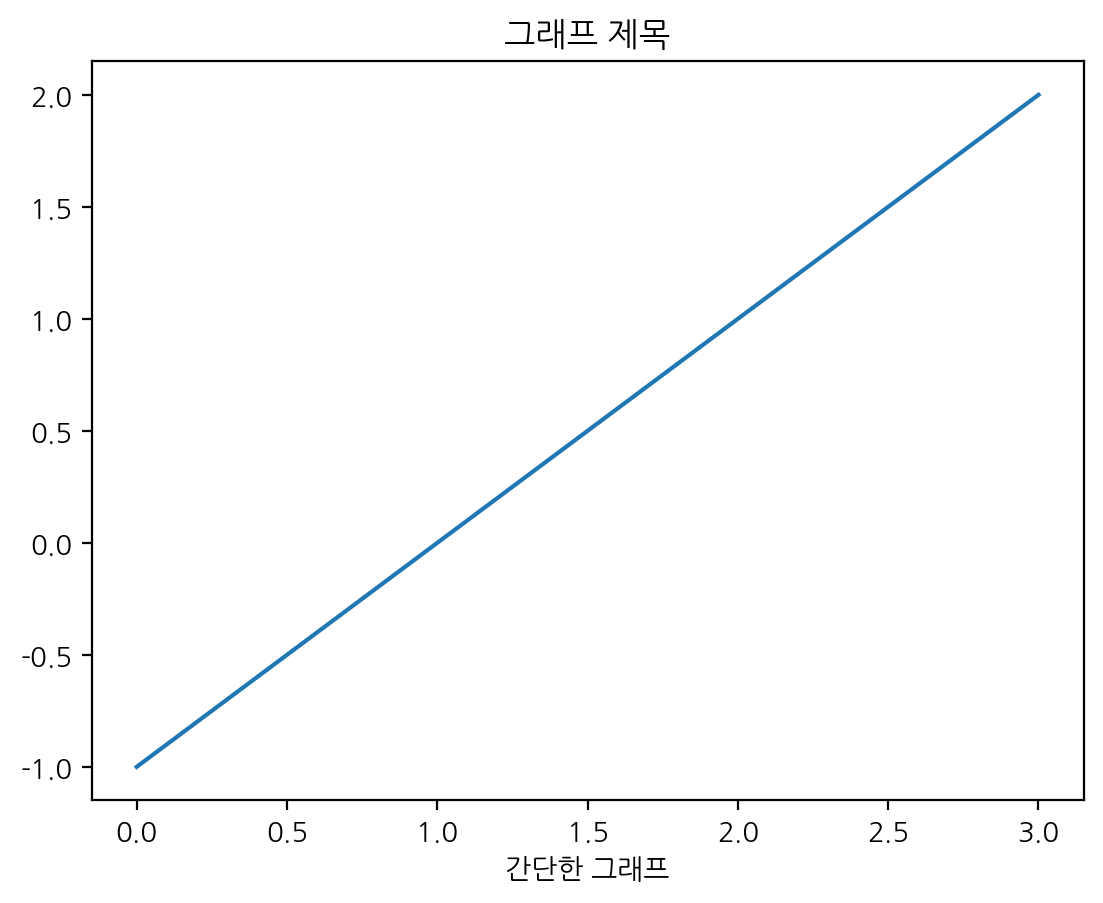

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목')
plt.xlabel('간단한 그래프')
plt.show()

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.84 MiB/s, done.


In [ ]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
16,17,5,65,68,98
13,14,4,48,87,12
17,18,5,80,78,90
5,6,2,50,89,98


In [ ]:
exam.agg("mean")

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [ ]:
exam.agg(["mean","median"])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [ ]:
exam.agg(mean_math = ('math','mean'))

,math
mean_math,57.45


In [ ]:
import numpy as np
df = pd.DataFrame([[1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [np.nan, np.nan, 10]],
                  columns = ['A','B','C']
                  )
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg(['sum','mean','median','min','max','count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum','mean','median','min','max'],axis=0)

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0


In [ ]:
df.agg(['sum','mean','median','min','max'], axis =1 )

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


In [ ]:
pd.Series([np.nan,np.nan,np.nan,5]).mean()

5.0

In [ ]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg({'A':['sum','min'], 'B':['min','max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [ ]:
df.agg(x=('A','max'),y=('B','min'),z=('C','mean'))

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [ ]:
df.agg("mean",axis="columns")

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [ ]:
df.agg("mean",axis="index")

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg(["sum","mean"], axis = "columns")

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [ ]:
df.agg(["sum","mean"],axis="index")

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


In [ ]:
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


## 집단별 요약 통계량 구하기

In [ ]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.groupby('nclass').agg(mean_math=('math','mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').mean()['math']

nclass
1    46.25
2    61.25
3    45.00
4    56.75
5    78.00
Name: math, dtype: float64

In [ ]:
exam.groupby('nclass').mean()[['math']]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').mean()[['english']]

,english
nclass,
1,94.75
2,84.25
3,86.50
4,84.75
5,74.25


In [ ]:
exam.groupby('nclass').agg("mean")

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(["mean","median"])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass').agg(mean_math = ('math',"mean"))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg(math = ('math','mean'))

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg({'math':'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg({'math':['mean','min','max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

In [ ]:
exam.groupby('nclass', as_index=False).agg(mean_math = ('math','mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


In [ ]:
exam.groupby('nclass').agg(mean_math=('math','mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
exam.sample(5)

,id,nclass,math,english,science
14,15,4,75,56,78
17,18,5,80,78,90
18,19,5,89,68,87
4,5,2,25,80,65
5,6,2,50,89,98


In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
exam.groupby('nclass')

In [ ]:
list(exam.groupby('nclass'))

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [ ]:
list(exam.groupby('nclass'))[0]

(1,
    id  nclass  math  english  science
 0   1       1    50       98       50
 1   2       1    60       97       60
 2   3       1    45       86       78
 3   4       1    30       98       58)

In [ ]:
list(exam.groupby('nclass'))[0][1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [ ]:
for key,value in exam.groupby('nclass'):
  print(key,"\n")
  print(type(value))
  print(value,"\n","-"*40,"\n")

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ---------------------------------------- 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ---------------------------------------- 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ---------------------------------------- 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  1

In [ ]:
exam.groupby('nclass') \
          .agg(mean_math = ('math','mean'),
               sum_math = ('math','sum'),
               median_math = ('math','median'),
               n = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


## 모든 변수의 요약 통계량 한 번에 구하기

In [ ]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(['mean','median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [ ]:
exam.groupby('nclass').head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
exam.groupby('nclass')['id'].count()

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

In [ ]:
exam.groupby('nclass')['id'].count()

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

In [ ]:
exam.groupby('nclass').count()

,id,math,english,science
nclass,,,,
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
5,4,4,4,4


In [ ]:
exam.groupby('nclass').count()['id']

nclass
1    4
2    4
3    4
4    4
5    4
Name: id, dtype: int64

## 집단별로 다시 집단 나누기

In [ ]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
mpg.groupby(['manufacturer', 'drv']).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
207,volkswagen,gti,2.0,1999,4,manual(m5),f,21,29,r,compact
208,volkswagen,gti,2.0,1999,4,auto(l4),f,19,26,r,compact
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
210,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact


In [ ]:
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty','mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [ ]:
# 제조 회사 및 차종별 분리
# cty 평균 구하기
# hwy 평균 구하기

mpg.groupby(['manufacturer', 'category']).agg(mean_cty = ('cty','mean'), mean_hwy = ('hwy','mean'))

mean_cty   mean_hwy
manufacturer category                        
audi         compact     17.933333  26.933333
             midsize     16.000000  24.000000
chevrolet    2seater     15.400000  24.800000
             midsize     18.800000  27.600000
             suv         12.666667  17.111111
dodge        minivan     15.818182  22.363636
             pickup      12.052632  16.105263
             suv         11.857143  16.000000
ford         pickup      13.000000  16.428571
             subcompact  15.888889  23.222222
             suv         12.888889  17.777778
honda        subcompact  24.444444  32.555556
hyundai      midsize     19.000000  27.714286
             subcompact  18.285714  26.000000
jeep         suv         13.500000  17.625000
land rover   suv         11.500000  16.500000
lincoln      suv         11.333333  17.000000
mercury      suv         13.250000  18.000000
nissan       compact     20.000000  28.000000
             midsize     20.000000  27.428571
             suv         13.750000  18.000000
pontiac      midsize     17.000000  26.400000
subaru       compact     19.750000  26.000000
             subcompact  19.500000  26.000000
             suv         18.833333  25.000000
toyota       compact     22.250000  30.583333
             midsize     19.857143  28.285714
             pickup      15.571429  19.428571
             suv         14.375000  18.250000
volkswagen   compact     20.785714  28.500000
             midsize     18.571429  27.571429
             subcompact  24.000000  32.833333

In [ ]:
mpg.query('manufacturer == "audi"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby('drv').agg(n = ('drv','count'))

,n
drv,
4,4
f,5
r,10


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby('drv').count()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby('drv').count()[['model']]

,model
drv,
4,4
f,5
r,10


In [ ]:
mpg.query('manufacturer == "chevrolet"').groupby('drv').count()[['model']].rename(columns = {'model' : 'n'})

,n
drv,
4,4
f,5
r,10


## value_counts()로 집단별 빈도 간단하게 구하기

In [ ]:
mpg.groupby('drv').agg(n = ('drv','count'))

,n
drv,
4,103
f,106
r,25


In [ ]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [ ]:
mpg[['drv','cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [ ]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


In [ ]:
mpg['drv'].value_counts().to_frame()

,drv
f,106
4,103
r,25


In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출

mpg['drv'].value_counts().to_frame('n').rename_axis('drv').query('n> 100')

,n
drv,
f,106
4,103


In [ ]:
mpg['drv'].value_counts().to_frame('n')

,n
f,106
4,103
r,25


In [ ]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [ ]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500
ford,15.333333
chevrolet,14.888889
lincoln,14.166667
land rover,14.000000


In [ ]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
total = pd.merge(test1,test2, how = 'left', on='id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
total = pd.merge(test1, test2, how = 'left')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
pd.merge(test1, test2, on='id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [ ]:
name = pd.DataFrame({'nclass' : [1,2,3,4,5],
                     'teacher': ['kim','lee','park','choi','jung']
                     })
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [ ]:
pd.merge(exam,name, on='nclass', how = 'inner')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


## 세로로 합치기: concat()

In [ ]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [ ]:
group_a

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
group_b

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
group_all = pd.concat([group_a,group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
group_all.reset_index()

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [ ]:
group_all.reset_index(drop=True)

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


In [ ]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [ ]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


## merge() 시험예상

In [ ]:
df1 = pd.DataFrame([[1, 'apple'], [2, 'banana']],
                  columns = ['id', 'fruits'])
df1

,id,fruits
0,1,apple
1,2,banana


In [ ]:
df2 = pd.DataFrame([[1, 3000], [5, 500]],
                  columns = ['id', 'price'])
df2

,id,price
0,1,3000
1,5,500


In [ ]:
df1.merge(df2)

,id,fruits,price
0,1,apple,3000


In [ ]:
df1.merge(df2, how='inner')

,id,fruits,price
0,1,apple,3000


In [ ]:
df1.merge(df2, how='outer')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN
2,5,NaN,500.0


In [ ]:
df1.merge(df2, how='left')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [ ]:
df1.merge(df2, how='right')

,id,fruits,price
0,1,apple,3000
1,5,NaN,500


In [ ]:
df1.merge(df2, how='cross')

,id_x,fruits,id_y,price
0,1,apple,1,3000
1,1,apple,5,500
2,2,banana,1,3000
3,2,banana,5,500


## 정리하기

In [ ]:
df1.merge(df2, how='outer')